# BuildWithAI2021 - Entrepreneurial Competency in University Students

In [30]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report,precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split

In [31]:
# Read the dataset
df = pd.read_csv('data.csv')
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


### 1. Data Description

In [32]:
# Shape of data 
df.shape

(219, 17)

In [33]:
# Informational summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

In [34]:
# 5 point summary of numerical data
df.describe()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,19.753425,3.351598,3.621005,3.589041,3.721461,3.908676,3.575342,3.561644,0.415525
std,1.289842,0.995234,1.152467,1.110859,1.053629,1.023068,1.120098,1.100287,0.493941
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,20.000000,4.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,1.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [35]:
# Checking for nulls
df.isnull().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

In [36]:
# Value counts in y
df['y'].value_counts()

0    128
1     91
Name: y, dtype: int64

**Observation:**

1.Reason for lack feature contains values for only those students which do not have Entrepreneurial Competency.

2.Almost 40% records contains nulls, hence we will drop this column before proceeding for model building.


### 2. Exploratory Data Analysis

In [37]:
df.head(1)

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1


0    58.447489
1    41.552511
Name: y, dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


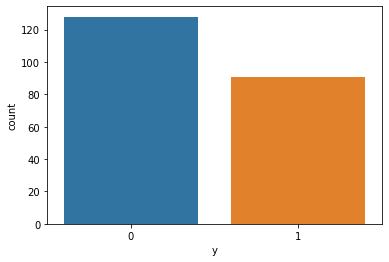

In [38]:
print(df['y'].value_counts(1) *100)
sns.countplot(df['y']);

**Inference:**

1.In this data 41.55% students have Entrepreneurial skills and 58.44% don't.

In [39]:
df.iloc[:,0].value_counts()

Engineering Sciences                                     123
Economic Sciences, Business Studies, Commerce and Law     32
Art, Music or Design                                      21
Others                                                    20
Medicine, Health Sciences                                 10
Humanities and Social Sciences                             5
Mathematics or Natural Sciences                            4
Teaching Degree (e.g., B.Ed)                               3
Language and Cultural Studies                              1
Name: EducationSector, dtype: int64

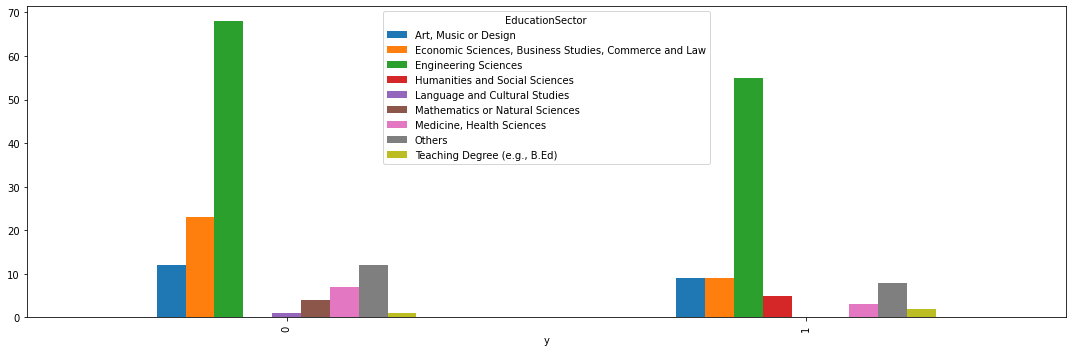

In [40]:
pd.crosstab(df['y'],df['EducationSector']).plot(kind='bar',figsize=(15,5))
plt.tight_layout()
plt.show()

**Inference:**

From the record of 219 students, 123 are engineers. Hence results are pretty obvious that most Engineers are showing Entrepreneurial skills.

Male      73.972603
Female    26.027397
Name: Gender, dtype: float64

y        0   1
Gender        
Female  37  20
Male    91  71


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


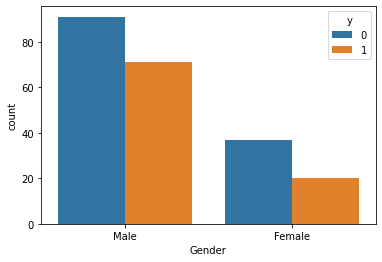

In [41]:
print(df['Gender'].value_counts(1) *100)
print()
print(pd.crosstab(df['Gender'],df['y']))
sns.countplot(df['Gender'],hue=df['y']);

**Inference:**

*  ~40% of males have Entrepreneurial skills.
*  ~35% of females have Entrepreneurial skills.

<AxesSubplot:>

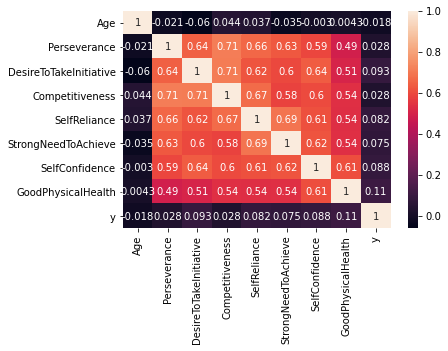

In [42]:
# Heat map
sns.heatmap(df.corr(),annot=True)

**Inference:**

From the heatmap we can see that features are correlated, this may cause some problem in model building.


### 3. Model Building
NOTE: After carefully studying that data we realised that 'EducationSector', 'IndividualProject', 'Age', 'Gender', 'City','GoodPhysicalHealth', 'MentalDisorder','ReasonsForLack' will not be useful in model building. Hence dropping them.

In [43]:
# relevant columns
data = df.loc[:,['Influenced', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve','KeyTraits','y']]
data.head()

,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,KeyTraits,y
0,No,2,2,3,3,2,Passion,1
1,Yes,3,3,3,4,4,Vision,0
2,No,3,4,3,3,3,Passion,0
3,Yes,3,3,3,3,4,Resilience,0
4,Yes,2,3,3,3,4,Vision,1


In [44]:
# encoding 
data["Influenced"] = data["Influenced"].astype("category").cat.codes
data["KeyTraits"] = data["KeyTraits"].astype("category").cat.codes

In [45]:
X = data.drop('y',axis=1)
y = data.y

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
col = ['Model Name','Accuracy','recall','f1','precision']
result = pd.DataFrame(columns=col)
result

,Model Name,Accuracy,recall,f1,precision


In [47]:
def model(model_name,model_est):
    
    global result
    
    model_fit = model_est.fit(X_train,y_train)
    y_pred = model_fit.predict(X_test)
    
    model_scores = model_fit.score(X_test,y_test)
                         
    model_recall = recall_score(y_test, y_pred)
    
    model_f1 = f1_score(y_test, y_pred)
       
    model_precision = precision_score(y_test, y_pred)
    
    mlmodel = pd.Series({'Model Name':model_name,'Accuracy':model_scores,'recall':model_recall,
                            'f1': model_f1,'precision': model_precision})
                         
    result = result.append(mlmodel,ignore_index=True)
                         
    return result

In [48]:
lr = LogisticRegression()
model('Logistic Regression',lr)

svc = SVC()
model('SVC',svc)

cb = CatBoostClassifier()
model('catboost',cb)

xgb = XGBClassifier()
model('XG Boost',xgb)

knn = KNeighborsClassifier()
model('K Neighbours',knn)

dt = DecisionTreeClassifier()
model('Decision Tree',dt)

rf = RandomForestClassifier()
model('Random Forest',rf)

ad = AdaBoostClassifier()
model('Ada Boost',ad)

gb = GradientBoostingClassifier()
model('Gradient Boosting',gb)

xgbr = XGBRFClassifier(objective='binary:logistic',eval_metric=['logloss'])
model('XGB RF',xgbr)

lgbm = LGBMClassifier()
model('Light GBM',lgbm)

Learning rate set to 0.004622
0:	learn: 0.6923007	total: 769us	remaining: 769ms
1:	learn: 0.6916469	total: 1.54ms	remaining: 770ms
2:	learn: 0.6913161	total: 2.22ms	remaining: 737ms
3:	learn: 0.6903787	total: 3.03ms	remaining: 754ms
4:	learn: 0.6891427	total: 3.71ms	remaining: 738ms
5:	learn: 0.6878724	total: 4.45ms	remaining: 738ms
6:	learn: 0.6873144	total: 5.15ms	remaining: 731ms
7:	learn: 0.6867092	total: 5.87ms	remaining: 728ms
8:	learn: 0.6857943	total: 6.63ms	remaining: 730ms
9:	learn: 0.6849629	total: 7.4ms	remaining: 733ms
10:	learn: 0.6837700	total: 8.13ms	remaining: 731ms
11:	learn: 0.6827123	total: 8.86ms	remaining: 729ms
12:	learn: 0.6818368	total: 9.56ms	remaining: 726ms
13:	learn: 0.6808824	total: 10.3ms	remaining: 724ms
14:	learn: 0.6805722	total: 10.8ms	remaining: 712ms
15:	learn: 0.6797706	total: 11.6ms	remaining: 713ms
16:	learn: 0.6788197	total: 12.3ms	remaining: 713ms
17:	learn: 0.6780905	total: 13ms	remaining: 711ms
18:	learn: 0.6772718	total: 13.8ms	remaining: 71

175:	learn: 0.5773367	total: 161ms	remaining: 753ms
176:	learn: 0.5767442	total: 162ms	remaining: 753ms
177:	learn: 0.5761115	total: 163ms	remaining: 753ms
178:	learn: 0.5760355	total: 164ms	remaining: 751ms
179:	learn: 0.5753382	total: 164ms	remaining: 749ms
180:	learn: 0.5746653	total: 165ms	remaining: 747ms
181:	learn: 0.5743859	total: 166ms	remaining: 746ms
182:	learn: 0.5738836	total: 167ms	remaining: 744ms
183:	learn: 0.5733024	total: 167ms	remaining: 742ms
184:	learn: 0.5730145	total: 168ms	remaining: 741ms
185:	learn: 0.5727239	total: 169ms	remaining: 739ms
186:	learn: 0.5723548	total: 170ms	remaining: 738ms
187:	learn: 0.5718778	total: 171ms	remaining: 737ms
188:	learn: 0.5717682	total: 171ms	remaining: 735ms
189:	learn: 0.5711799	total: 172ms	remaining: 733ms
190:	learn: 0.5711358	total: 173ms	remaining: 731ms
191:	learn: 0.5702355	total: 173ms	remaining: 730ms
192:	learn: 0.5699261	total: 174ms	remaining: 729ms
193:	learn: 0.5698322	total: 175ms	remaining: 727ms
194:	learn: 

503:	learn: 0.4595924	total: 464ms	remaining: 457ms
504:	learn: 0.4592960	total: 465ms	remaining: 456ms
505:	learn: 0.4591322	total: 466ms	remaining: 455ms
506:	learn: 0.4589941	total: 467ms	remaining: 454ms
507:	learn: 0.4585405	total: 468ms	remaining: 453ms
508:	learn: 0.4583566	total: 469ms	remaining: 452ms
509:	learn: 0.4582191	total: 470ms	remaining: 451ms
510:	learn: 0.4577542	total: 470ms	remaining: 450ms
511:	learn: 0.4573504	total: 471ms	remaining: 449ms
512:	learn: 0.4571637	total: 472ms	remaining: 448ms
513:	learn: 0.4570659	total: 473ms	remaining: 447ms
514:	learn: 0.4565756	total: 473ms	remaining: 446ms
515:	learn: 0.4564492	total: 474ms	remaining: 445ms
516:	learn: 0.4563218	total: 475ms	remaining: 444ms
517:	learn: 0.4560977	total: 475ms	remaining: 442ms
518:	learn: 0.4557076	total: 476ms	remaining: 441ms
519:	learn: 0.4556374	total: 477ms	remaining: 440ms
520:	learn: 0.4551294	total: 478ms	remaining: 440ms
521:	learn: 0.4548188	total: 479ms	remaining: 439ms
522:	learn: 

702:	learn: 0.4137364	total: 620ms	remaining: 262ms
703:	learn: 0.4135512	total: 621ms	remaining: 261ms
704:	learn: 0.4133527	total: 622ms	remaining: 260ms
705:	learn: 0.4131316	total: 623ms	remaining: 260ms
706:	learn: 0.4130029	total: 624ms	remaining: 259ms
707:	learn: 0.4128620	total: 625ms	remaining: 258ms
708:	learn: 0.4125968	total: 626ms	remaining: 257ms
709:	learn: 0.4124729	total: 626ms	remaining: 256ms
710:	learn: 0.4121745	total: 627ms	remaining: 255ms
711:	learn: 0.4120391	total: 628ms	remaining: 254ms
712:	learn: 0.4116961	total: 629ms	remaining: 253ms
713:	learn: 0.4115724	total: 629ms	remaining: 252ms
714:	learn: 0.4111829	total: 630ms	remaining: 251ms
715:	learn: 0.4110530	total: 631ms	remaining: 250ms
716:	learn: 0.4109137	total: 632ms	remaining: 249ms
717:	learn: 0.4106923	total: 633ms	remaining: 248ms
718:	learn: 0.4104172	total: 633ms	remaining: 247ms
719:	learn: 0.4101763	total: 634ms	remaining: 247ms
720:	learn: 0.4100240	total: 635ms	remaining: 246ms
721:	learn: 

892:	learn: 0.3770605	total: 778ms	remaining: 93.2ms
893:	learn: 0.3769170	total: 779ms	remaining: 92.3ms
894:	learn: 0.3767216	total: 780ms	remaining: 91.5ms
895:	learn: 0.3765650	total: 781ms	remaining: 90.6ms
896:	learn: 0.3763590	total: 781ms	remaining: 89.7ms
897:	learn: 0.3763560	total: 782ms	remaining: 88.8ms
898:	learn: 0.3762162	total: 783ms	remaining: 88ms
899:	learn: 0.3759697	total: 785ms	remaining: 87.2ms
900:	learn: 0.3757641	total: 786ms	remaining: 86.4ms
901:	learn: 0.3756660	total: 787ms	remaining: 85.5ms
902:	learn: 0.3756165	total: 787ms	remaining: 84.6ms
903:	learn: 0.3754815	total: 788ms	remaining: 83.7ms
904:	learn: 0.3753811	total: 789ms	remaining: 82.9ms
905:	learn: 0.3752019	total: 790ms	remaining: 82ms
906:	learn: 0.3750475	total: 791ms	remaining: 81.1ms
907:	learn: 0.3747610	total: 792ms	remaining: 80.2ms
908:	learn: 0.3745467	total: 792ms	remaining: 79.3ms
909:	learn: 0.3744130	total: 794ms	remaining: 78.5ms
910:	learn: 0.3743072	total: 795ms	remaining: 77.7

,Model Name,Accuracy,recall,f1,precision
0,Logistic Regression,0.621212,0.36,0.418605,0.500000
1,SVC,0.621212,0.16,0.242424,0.500000
2,catboost,0.681818,0.52,0.553191,0.590909
3,XG Boost,0.727273,0.64,0.640000,0.640000
4,K Neighbours,0.606061,0.56,0.518519,0.482759
5,Decision Tree,0.621212,0.48,0.489796,0.500000
6,Random Forest,0.666667,0.48,0.521739,0.571429
7,Ada Boost,0.621212,0.40,0.444444,0.500000
8,Gradient Boosting,0.651515,0.52,0.530612,0.541667
9,XGB RF,0.742424,0.60,0.638298,0.681818


In [49]:
result.sort_values('Accuracy',ascending=False)

,Model Name,Accuracy,recall,f1,precision
9,XGB RF,0.742424,0.60,0.638298,0.681818
3,XG Boost,0.727273,0.64,0.640000,0.640000
10,Light GBM,0.696970,0.48,0.545455,0.631579
2,catboost,0.681818,0.52,0.553191,0.590909
6,Random Forest,0.666667,0.48,0.521739,0.571429
8,Gradient Boosting,0.651515,0.52,0.530612,0.541667
0,Logistic Regression,0.621212,0.36,0.418605,0.500000
1,SVC,0.621212,0.16,0.242424,0.500000
5,Decision Tree,0.621212,0.48,0.489796,0.500000
7,Ada Boost,0.621212,0.40,0.444444,0.500000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Accuracy', ylabel='Model Name'>

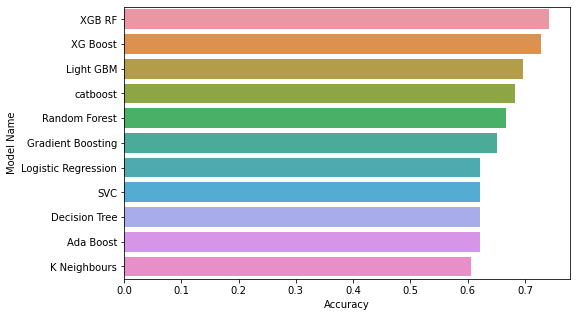

In [50]:
x = result.sort_values('Accuracy',ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x['Accuracy'],x['Model Name'])

**RESULTS :**

We were able to build a classifier with 74.2% accuracy using Extreme Gradient Boosting with Random forest ensemble.

---